*1. Give a simple argument for the Entropy as nH(p) based on i.i.d. random
variables.*

In case the random variables are indeed identical and independently distributed, each variable will contribute completely information-wise, such that the total information *H(p)* will linearly increase. However, in case the variables *would* depend on each other, then the information would not scale with *n*, but less than n, since there is some mutual information.

*2. Explain what the value $r$ in Eq. 2.2. represents. What values does the
text mention for r?*


In the context of *energy expenditure*, $r$ represents the units of energy within time interval $\tau$, when firing.

The values that the text mentions for $r$ are:
-  the carotic nerve, approx: 40
- spinal cord approx: 160
- sensory nerve fibers approx: 30 and 75

Therefore it's reasonable to  hypothesise that the values of r lie between 10 and 200, depending on the neuronal type.

*3. Derive an expression of the value of r as a function for p based on Eq. 2.3*

$$
\frac{C}{E} \approx \frac{H(p)}{1+p(r-1)}
$$

$$
\rightarrow (1+p(r-1)) = \frac{E H(p)}{C}
$$

$$
\rightarrow r = \frac{E H(p)}{pC} - \frac{1}{p} + 1
$$

*4. Reproduce the curves in Figure 1.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

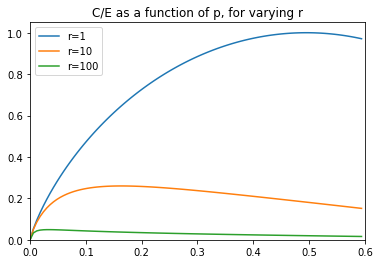

In [ ]:
def C_over_E(p,r):
  H_p = -p*np.log2(p) - (1-p) * np.log2(1-p)
  return H_p / (1+p*(r-1))

p = np.linspace(0.00001,0.6,100)
r_vals = [1,10,100]

for r in r_vals:
  C_E_vals = C_over_E(p,r)
  plt.plot(C_E_vals,label=f'r={r}')

plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xticks(ticks = np.linspace(0,100,7),labels = np.round(np.linspace(0,0.6,7),decimals = 2))
# plt.title('ratio of capacity & energy expenditure, as a function of p')
plt.title('C/E as a function of p, for varying r')
plt.legend()
plt.show()

*5. Reproduce the curves in Figure 2.*


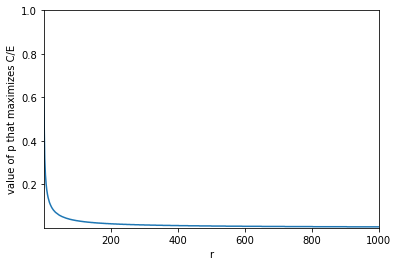

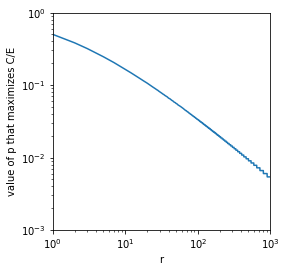

In [ ]:
p = np.linspace(0.00000000001,0.6,1000)
r_vals = np.linspace(0,1000,1000)
p_max = []

for r in r_vals:
  C_E_vals = C_over_E(p,r)
  maxCE = np.argmax(C_E_vals)
  p_max.append(p[maxCE])

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(r_vals,p_max)
plt.xlim([1,1000])
plt.ylim([0.001,1])
plt.xlabel('r')
plt.ylabel('value of p that maximizes C/E')
plt.show()


fig = plt.figure()
ax = fig.add_subplot()
plt.plot(r_vals,p_max)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1,1000])
plt.ylim([0.001,1])
plt.xlabel('r')
plt.ylabel('value of p that maximizes C/E')
ax.set_aspect('equal', adjustable='box')
plt.show()

*6. Try to derive Eq. 3.2. using Lagrange multipliers*

Answer is in seperate pdf submitted.

*7. Plot the curve in Figure 3, based on Eq. 3.6.*

<ipython-input-16-5f7ec8c7c430>:3: RuntimeWarning: divide by zero encountered in log2
  return (-f_mean * T * np.log2(f_mean*T) + (1 + f_mean*T) * np.log2(1+ f_mean * T)) / (1 + (r - 1)*(f_mean/fN))
<ipython-input-16-5f7ec8c7c430>:3: RuntimeWarning: invalid value encountered in multiply
  return (-f_mean * T * np.log2(f_mean*T) + (1 + f_mean*T) * np.log2(1+ f_mean * T)) / (1 + (r - 1)*(f_mean/fN))


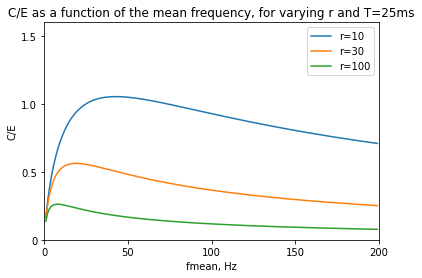

In [ ]:
def CoverE(f_mean, r, T):
  fN = 400
  return (-f_mean * T * np.log2(f_mean*T) + (1 + f_mean*T) * np.log2(1+ f_mean * T)) / (1 + (r - 1)*(f_mean/fN))


f = np.linspace(0, 200, 200)
r_vals = [10,30,100]

for r in r_vals:
  C_E_vals = CoverE(f, r, T= 0.025)
  plt.plot(C_E_vals,label=f'r={r}')

plt.xlim([0,200])
plt.ylim([0,1.6])
plt.ylabel('C/E')
plt.xlabel('fmean, Hz')
plt.xticks(ticks = np.linspace(0,200,5),labels = [0,50,100,150,200])
plt.yticks(ticks = np.linspace(0,1.5,4),labels = [0,0.5, 1.0, 1.5])


plt.title('C/E as a function of the mean frequency, for varying r and T=25ms')
plt.legend()
plt.show()

*8. Plot the curve in Figure 4, based on Eq. 3.6*

<ipython-input-16-5f7ec8c7c430>:3: RuntimeWarning: divide by zero encountered in log2
  return (-f_mean * T * np.log2(f_mean*T) + (1 + f_mean*T) * np.log2(1+ f_mean * T)) / (1 + (r - 1)*(f_mean/fN))
<ipython-input-16-5f7ec8c7c430>:3: RuntimeWarning: invalid value encountered in multiply
  return (-f_mean * T * np.log2(f_mean*T) + (1 + f_mean*T) * np.log2(1+ f_mean * T)) / (1 + (r - 1)*(f_mean/fN))


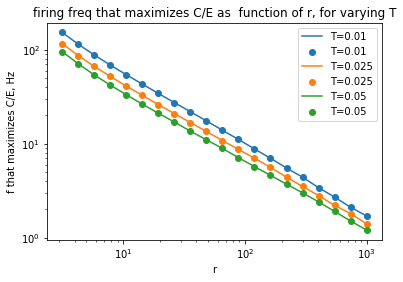

In [ ]:
f = np.linspace(0, 200, 2000)
r_vals = np.logspace(0.5,3,20)
T_vals = [0.01, 0.025, 0.05]

for T in T_vals:
  f_max = []
  for r in r_vals:
      C_E_vals = CoverE(f, r, T)
      maxCE = np.nanargmax(C_E_vals)
      f_max.append(f[maxCE])
  plt.plot(r_vals, f_max, label=f'T={T}')
  plt.scatter(r_vals, f_max, label=f'T={T}')

plt.ylabel('f that maximizes C/E, Hz')
plt.xlabel('r')
plt.xscale('log')
plt.yscale('log')

plt.title('firing freq that maximizes C/E as  function of r, for varying T')
plt.legend()
plt.show()



*9. Try to derive a relation between $\bar{f}$, T and r from Eq. 3.6.*